# Multiple Linear Regression on Toyoto corolla
## Assignment Task: Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
#read the data
df = pd.read_csv(r'D:\Data science\Assignments\MLR\MLR\ToyotaCorolla - MLR.csv')
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [7]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
#showing duplicate value
df[df.duplicated()] 

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
113  24950          8  13253    Diesel  116          0  2000      5   

     Cylinders  Gears  Weight  
113          4      5    1320

In [10]:
#Duplicate row
df[(df['Price'] == 24950) & (df['Fuel_Type'] == 'Diesel')]

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
112  24950          8  13253    Diesel  116          0  2000      5   
113  24950          8  13253    Diesel  116          0  2000      5   

     Cylinders  Gears  Weight  
112          4      5    1320  
113          4      5    1320

In [11]:
#Removing duplicate
df.duplicated(keep='last')

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [12]:
#Dropping the duplicate records and crosschecking
df.drop_duplicates(inplace=True),df.shape,df.duplicated().sum()

(None, (1435, 11), 0)

In [13]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

# Data visualization

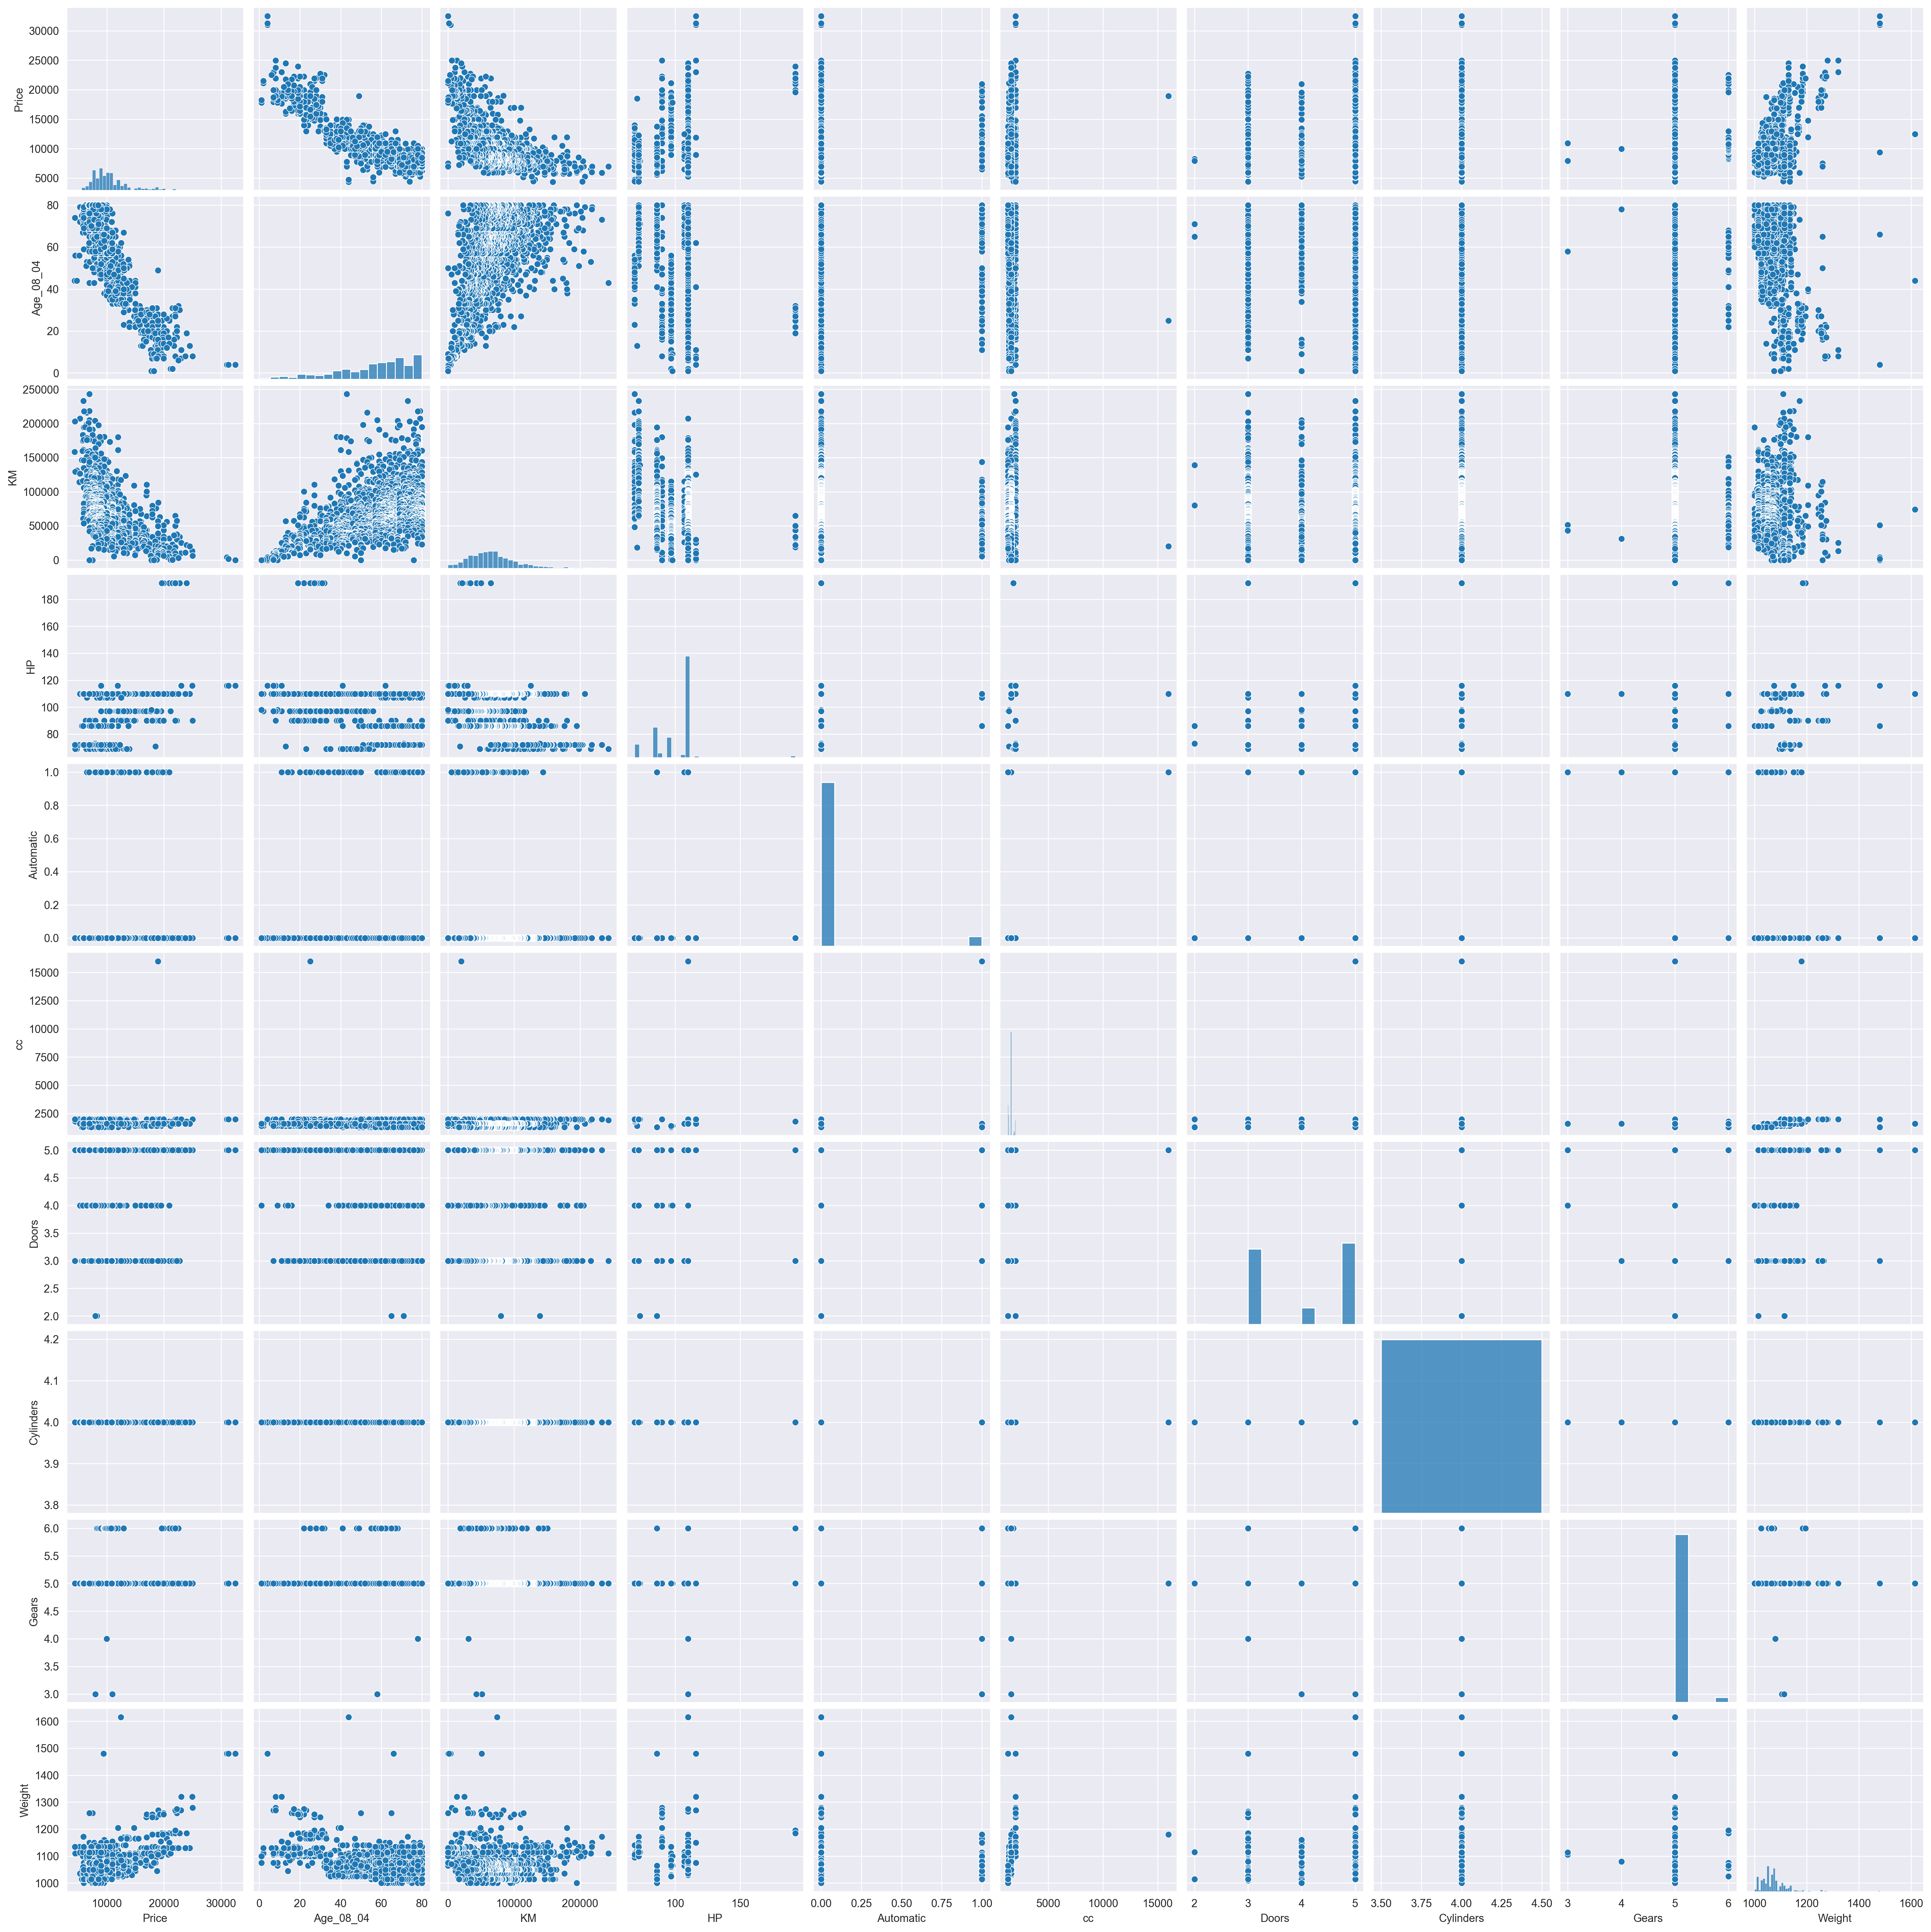

In [14]:
sns.pairplot(df)

<Axes: >

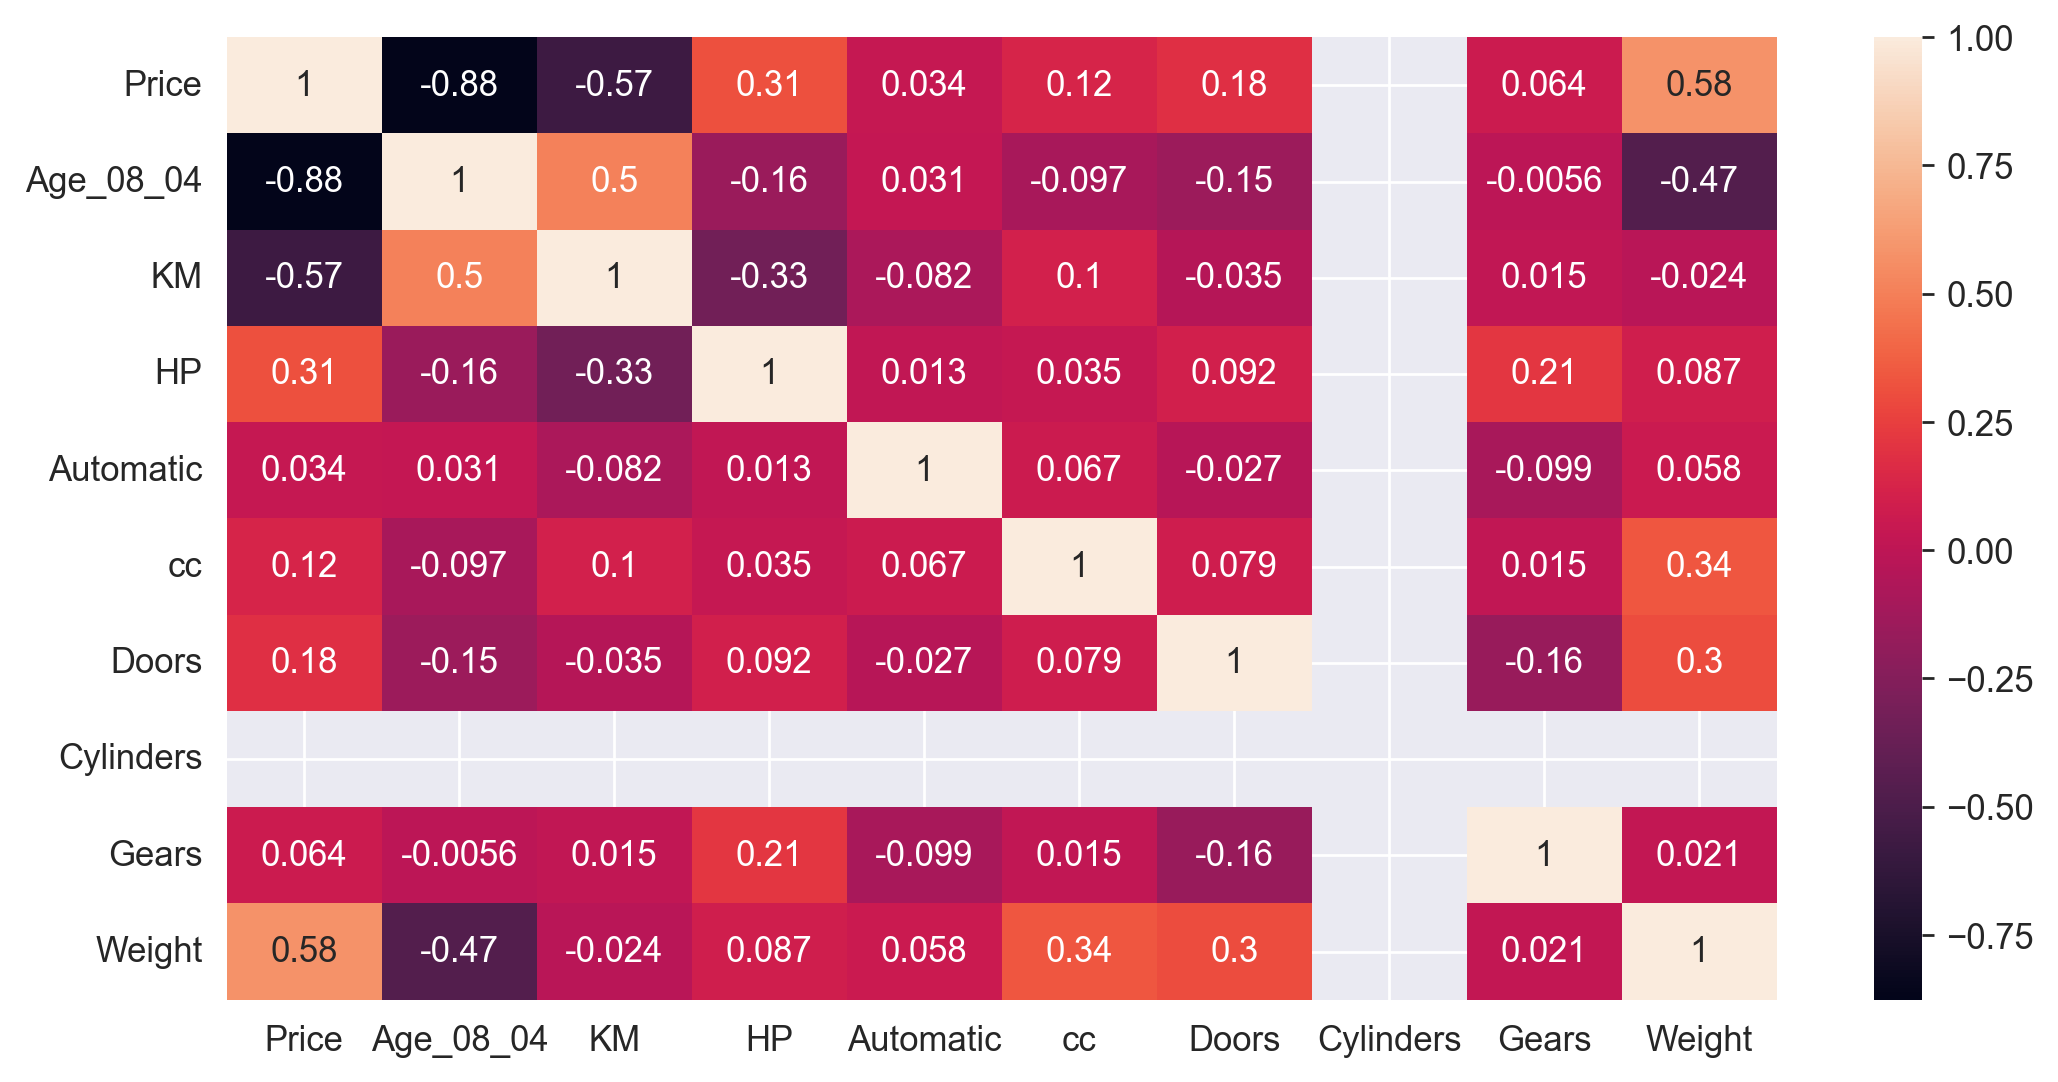

In [15]:
sns.heatmap(df.corr(),annot=True)

**Encoding to convert categorical column into numerical**


In [16]:
df = pd.get_dummies(data=df,columns=['Fuel_Type'],dtype=int)
df

Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0  2000      3          4      5   
1     13750         23  72937   90          0  2000      3          4      5   
2     13950         24  41711   90          0  2000      3          4      5   
3     14950         26  48000   90          0  2000      3          4      5   
4     13750         30  38500   90          0  2000      3          4      5   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500         69  20544   86          0  1300      3          4      5   
1432  10845         72  19000   86          0  1300      3          4      5   
1433   8500         71  17016   86          0  1300      3          4      5   
1434   7250         70  16916   86          0  1300      3          4      5   
1435   6950         76      1  110          0  1600      5          4      5   

      Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0       1165              0                 1                 0  
1       1165              0                 1                 0  
2       1165              0                 1                 0  
3       1165              0                 1                 0  
4       1170              0                 1                 0  
...      ...            ...               ...               ...  
1431    1025              0                 0                 1  
1432    1015              0                 0                 1  
1433    1015              0                 0                 1  
1434    1015              0                 0                 1  
1435    1114              0                 0                 1  

[1435 rows x 13 columns]

# Building Model

In [17]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [18]:
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()
model

In [19]:
model.rsquared,model.pvalues

(0.8637648551448405,
 Intercept            2.078738e-09
 Age_08_04           1.024567e-292
 KM                   5.848015e-37
 HP                   9.494286e-11
 Automatic            5.967263e-02
 cc                   5.718755e-01
 Doors                4.648374e-01
 Cylinders            2.078738e-09
 Gears                1.561888e-03
 Weight               4.221810e-59
 Fuel_Type_CNG        1.243589e-03
 Fuel_Type_Diesel     2.965389e-01
 Fuel_Type_Petrol     3.352110e-03
 dtype: float64)

# Calculate VIF

In [20]:
data = df.drop(columns=['Price'])
data

Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  Weight  \
0            23  46986   90          0  2000      3          4      5    1165   
1            23  72937   90          0  2000      3          4      5    1165   
2            24  41711   90          0  2000      3          4      5    1165   
3            26  48000   90          0  2000      3          4      5    1165   
4            30  38500   90          0  2000      3          4      5    1170   
...         ...    ...  ...        ...   ...    ...        ...    ...     ...   
1431         69  20544   86          0  1300      3          4      5    1025   
1432         72  19000   86          0  1300      3          4      5    1015   
1433         71  17016   86          0  1300      3          4      5    1015   
1434         70  16916   86          0  1300      3          4      5    1015   
1435         76      1  110          0  1600      5          4      5    1114   

      Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0                 0                 1                 0  
1                 0                 1                 0  
2                 0                 1                 0  
3                 0                 1                 0  
4                 0                 1                 0  
...             ...               ...               ...  
1431              0                 0                 1  
1432              0                 0                 1  
1433              0                 0                 1  
1434              0                 0                 1  
1435              0                 0                 1  

[1435 rows x 12 columns]

In [21]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [22]:
data.values

array([[   23, 46986,    90, ...,     0,     1,     0],
       [   23, 72937,    90, ...,     0,     1,     0],
       [   24, 41711,    90, ...,     0,     1,     0],
       ...,
       [   71, 17016,    86, ...,     0,     0,     1],
       [   70, 16916,    86, ...,     0,     0,     1],
       [   76,     1,   110, ...,     0,     0,     1]], dtype=int64)

In [23]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif

VIF
0   1.911952
1   2.002649
2   2.300692
3   1.094619
4   1.223606
5   1.217072
6   0.000000
7   1.117554
8   3.254342
9        inf
10       inf
11       inf

# Subset Selection

In [ ]:
#AIC we will consider WT HP and KM depend upon VIF factor

In [24]:
#KM
KM = smf.ols('Price~Age_08_04+KM+Automatic+cc+Doors+Cylinders+Gears+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()
KM.rsquared, KM.aic

(0.8069830914083697, 25237.30203184449)

In [25]:
#HP
HP = smf.ols('Price~Age_08_04+HP+Automatic+cc+Doors+Cylinders+Gears+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()
HP.rsquared, HP.aic

(0.8155998252500333, 25171.766248315173)

In [26]:
#Weight
Weight = smf.ols('Price~Age_08_04+Weight+Automatic+cc+Doors+Cylinders+Gears+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()
Weight.rsquared, Weight.aic

(0.8434853214899258, 24936.48585705087)

# MODEL VALIDATION TECHNIQUES
## 1.Residual Analysis

**As per the subset selection, it is clear that Weight column is more important than HP & KM  column as it's R2 value is more and AIC value is less,So we will select Weight columns and will drop HP and KM  column.**

In [27]:

Model = smf.ols('Price~Age_08_04+Weight+Automatic+cc+Doors+Cylinders+Gears+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()
Model.rsquared,Model.aic

(0.8434853214899258, 24936.48585705087)

In [28]:
model.fittedvalues  ##predicted value

0       16279.391959
1       15827.430557
2       16247.420682
3       15890.210892
4       15663.833741
            ...     
1431     8695.195996
1432     8143.498909
1433     8301.892590
1434     8427.474616
1435    10513.153028
Length: 1435, dtype: float64

In [29]:
model.resid  # error value actual (MPG)-predicted (MPG)

0      -2779.391959
1      -2077.430557
2      -2297.420682
3       -940.210892
4      -1913.833741
           ...     
1431   -1195.195996
1432    2701.501091
1433     198.107410
1434   -1177.474616
1435   -3563.153028
Length: 1435, dtype: float64

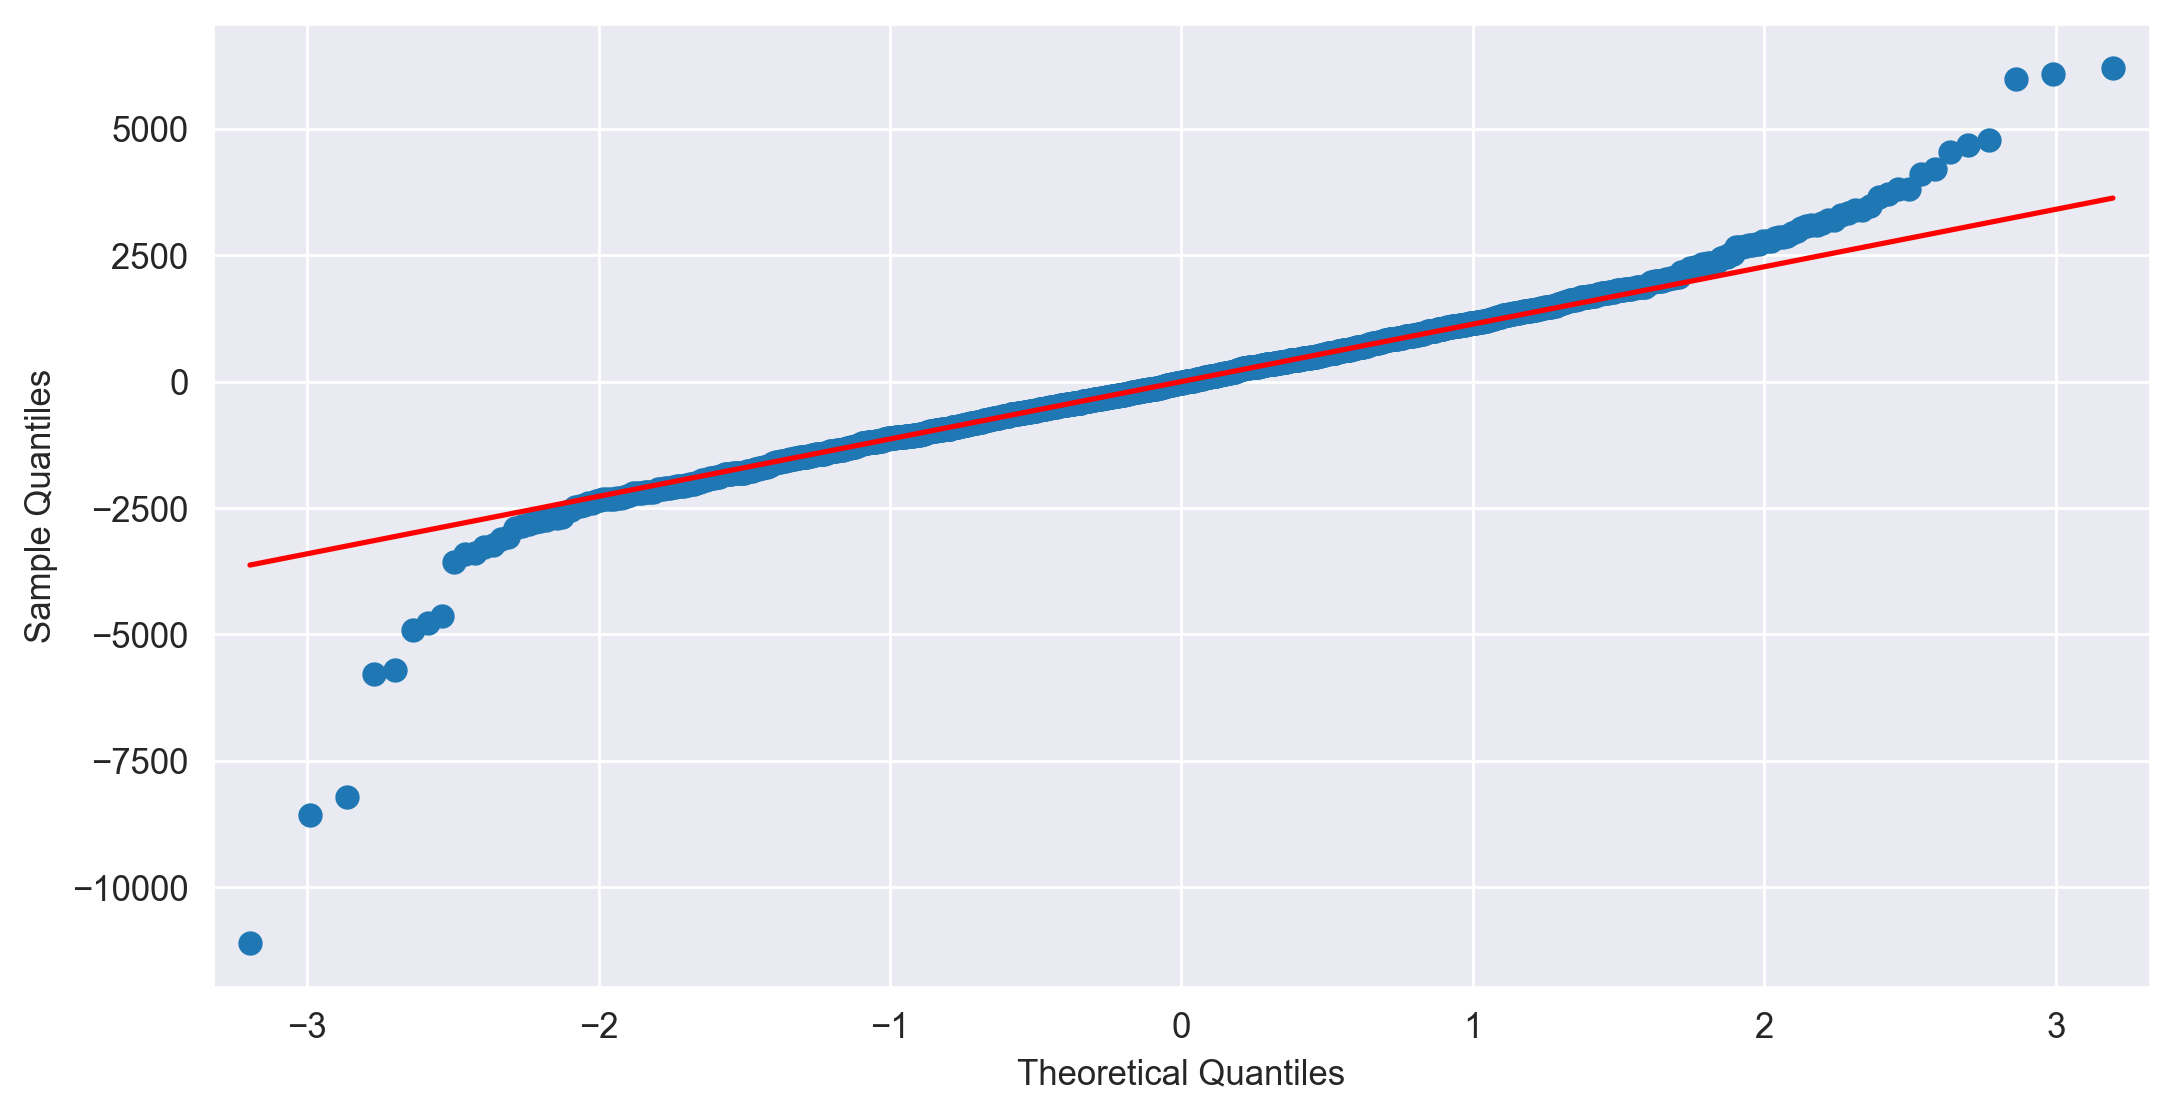

In [30]:
#Q-Q plot
sm.qqplot(model.resid, line = 'q');  # to print red quantile solid line line =q is required

In [ ]:
#get index for higher residuals

In [31]:
np.argmax(model.resid), np.max(model.resid) #argmax gives index number of recorde where error is max,and max
#function give maximum value

(146, 6201.686879860503)

# 2. Residual plot of Homoscedasticity

## Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [32]:
model.params

Intercept           -530.401308
Age_08_04           -123.840430
KM                    -0.017416
HP                    23.314614
Automatic            303.253603
cc                    -0.052021
Doors                -29.884035
Cylinders          -2121.605231
Gears                627.081986
Weight                20.706603
Fuel_Type_CNG       -737.372919
Fuel_Type_Diesel    -200.373996
Fuel_Type_Petrol     407.345607
dtype: float64

In [33]:
model.fittedvalues

0       16279.391959
1       15827.430557
2       16247.420682
3       15890.210892
4       15663.833741
            ...     
1431     8695.195996
1432     8143.498909
1433     8301.892590
1434     8427.474616
1435    10513.153028
Length: 1435, dtype: float64

In [34]:
model.resid

0      -2779.391959
1      -2077.430557
2      -2297.420682
3       -940.210892
4      -1913.833741
           ...     
1431   -1195.195996
1432    2701.501091
1433     198.107410
1434   -1177.474616
1435   -3563.153028
Length: 1435, dtype: float64

Text(0, 0.5, 'Errors')

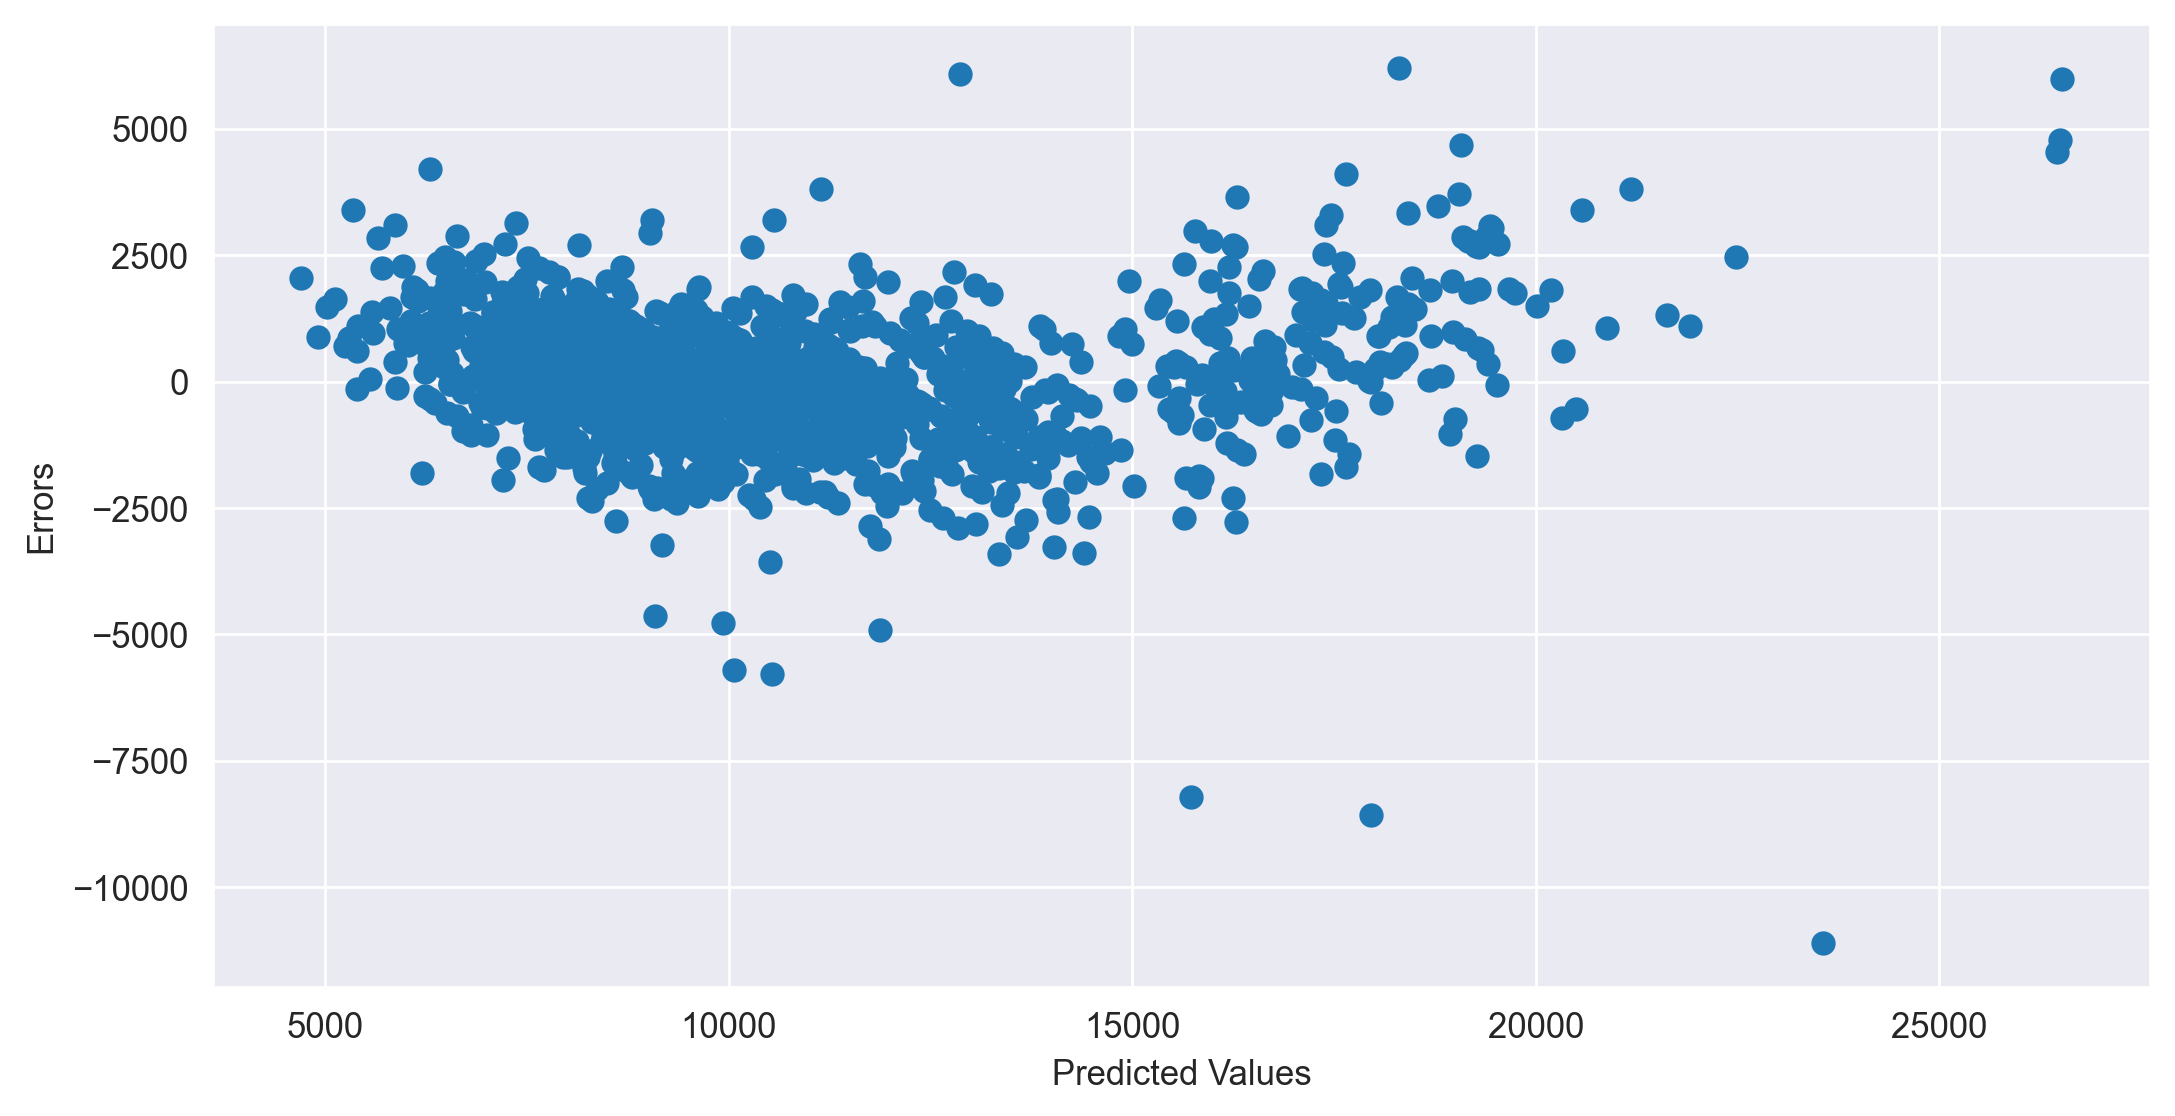

In [35]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

# 3.Residual VS Regressor

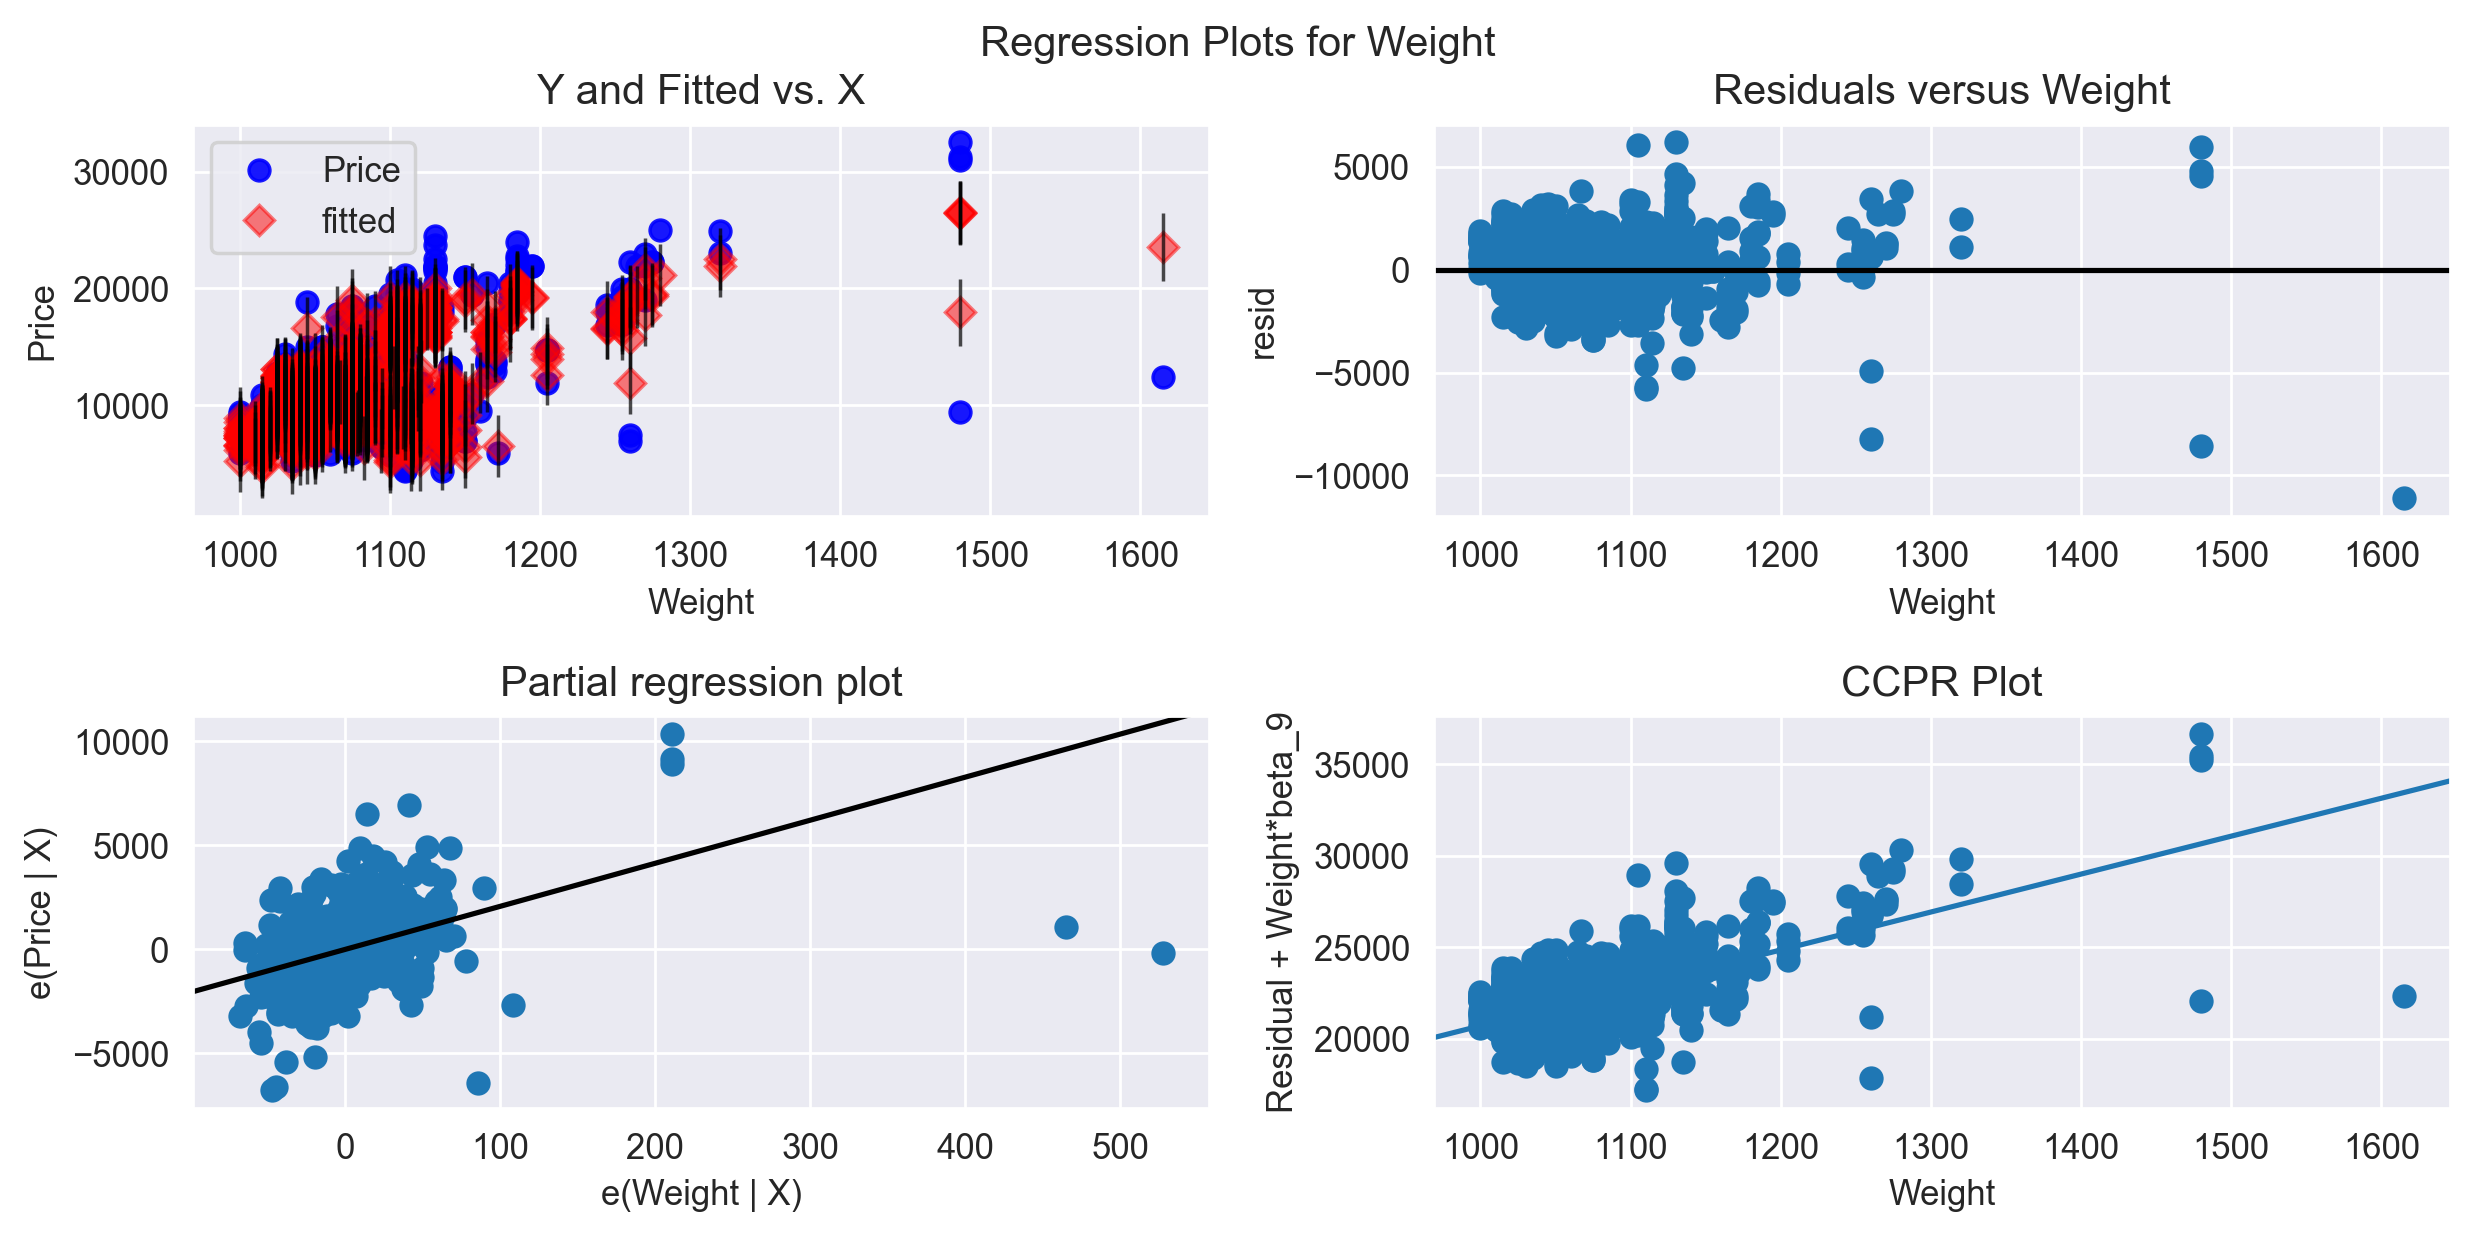

In [36]:
#Weight
sm.graphics.plot_regress_exog(model,'Weight');

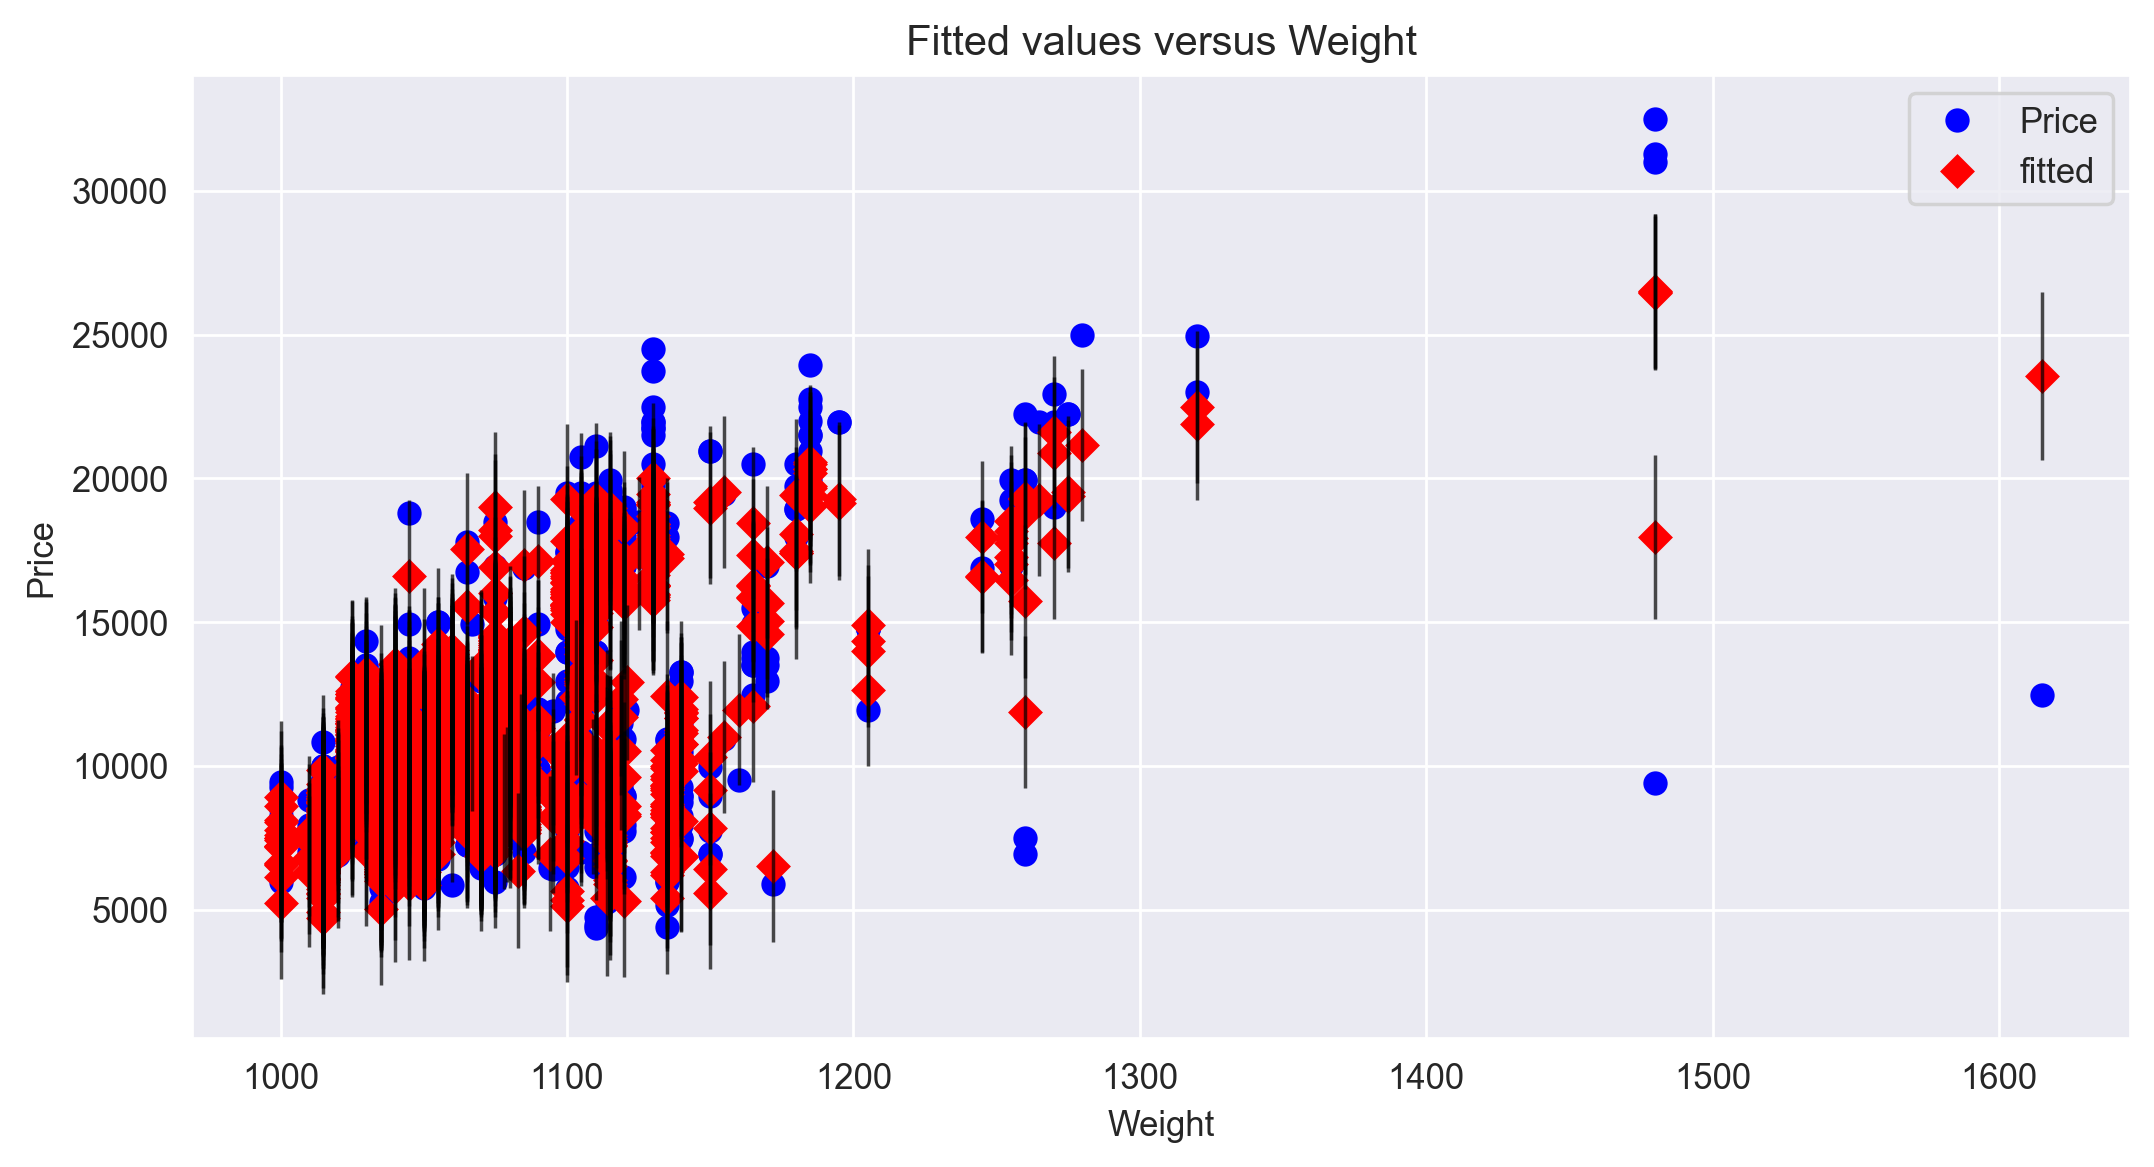

In [37]:
sm.graphics.plot_fit(model,'Weight');

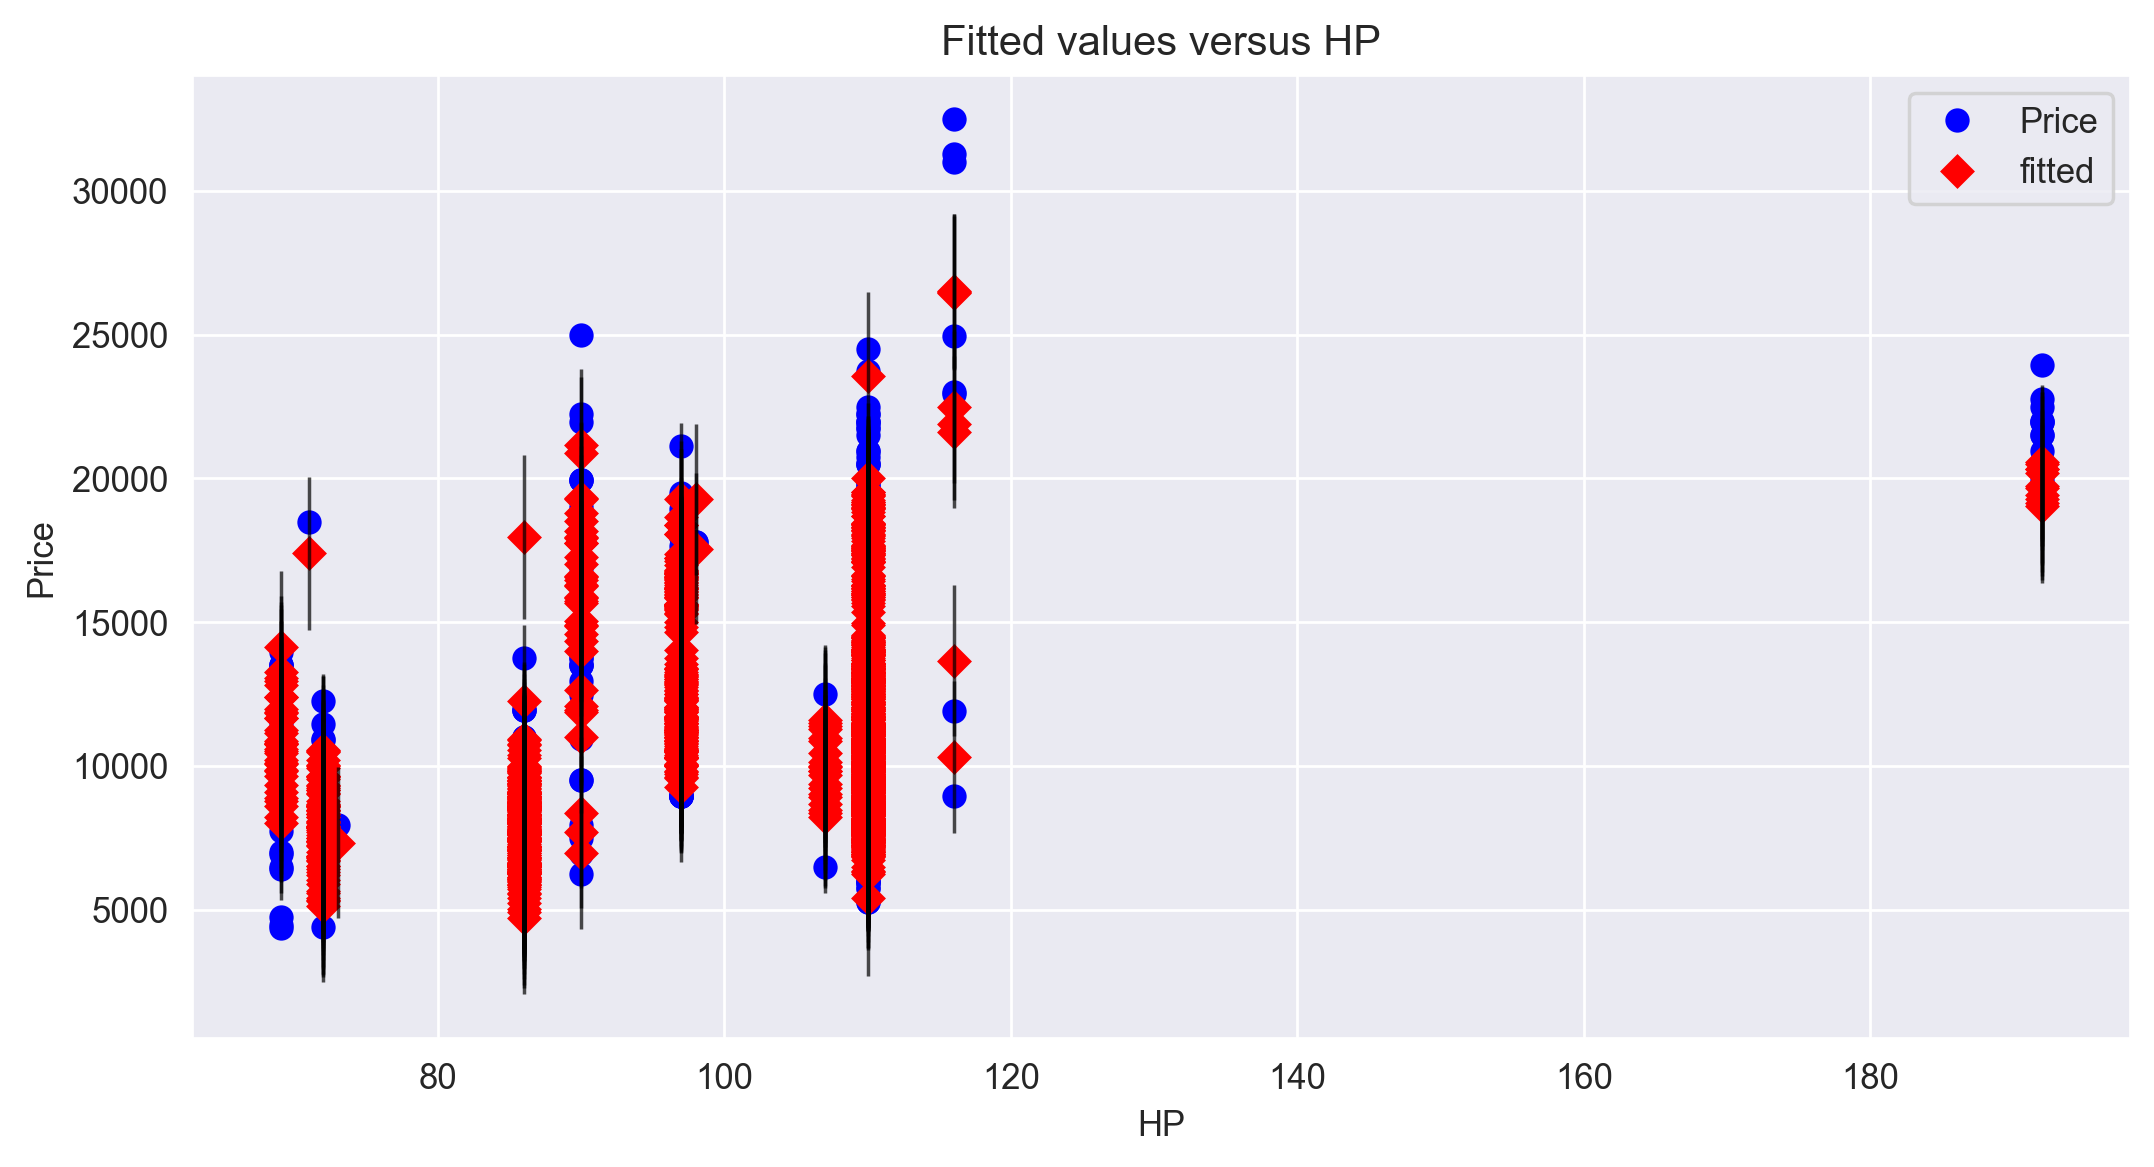

In [38]:
#Hp
sm.graphics.plot_fit(model,'HP');

# MODEL DELETION TECHNIQUES

## Cook's Distance

### Detecting influencers and outliers

In [39]:
model

In [40]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [41]:
c

array([3.87996512e-03, 1.96372028e-03, 2.72595191e-03, ...,
       1.14976622e-05, 3.97228447e-04, 6.49916569e-03])

Text(0, 0.5, 'Cooks Distance')

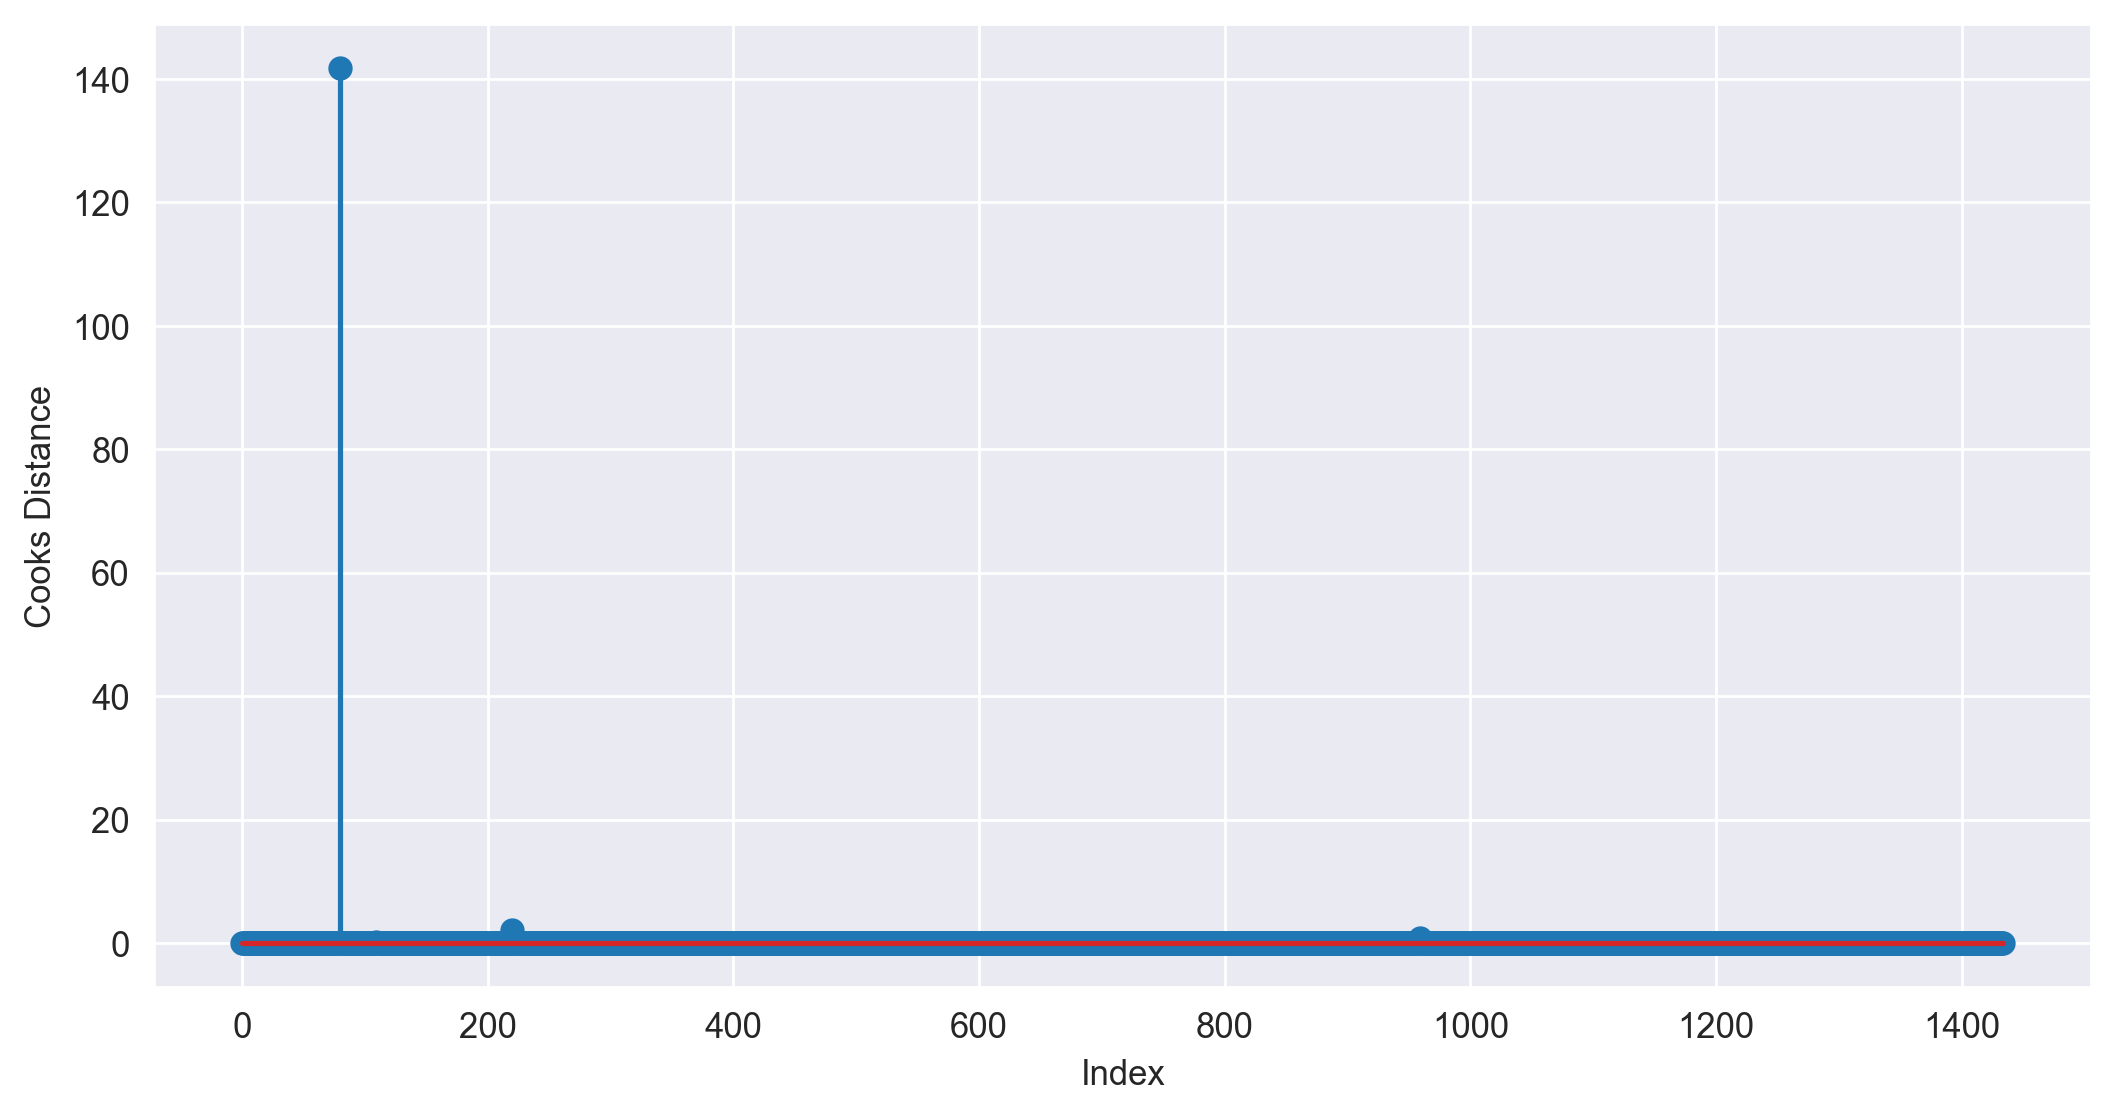

In [42]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [43]:
np.argmax(c), np.max(c)

(80, 141.774393459109)

In [44]:
df.iloc[[80]]  ##[[]] give in tabular format

Price  Age_08_04     KM   HP  Automatic     cc  Doors  Cylinders  Gears  \
80  18950         25  20019  110          1  16000      5          4      5   

    Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
80    1180              0                 0                 1

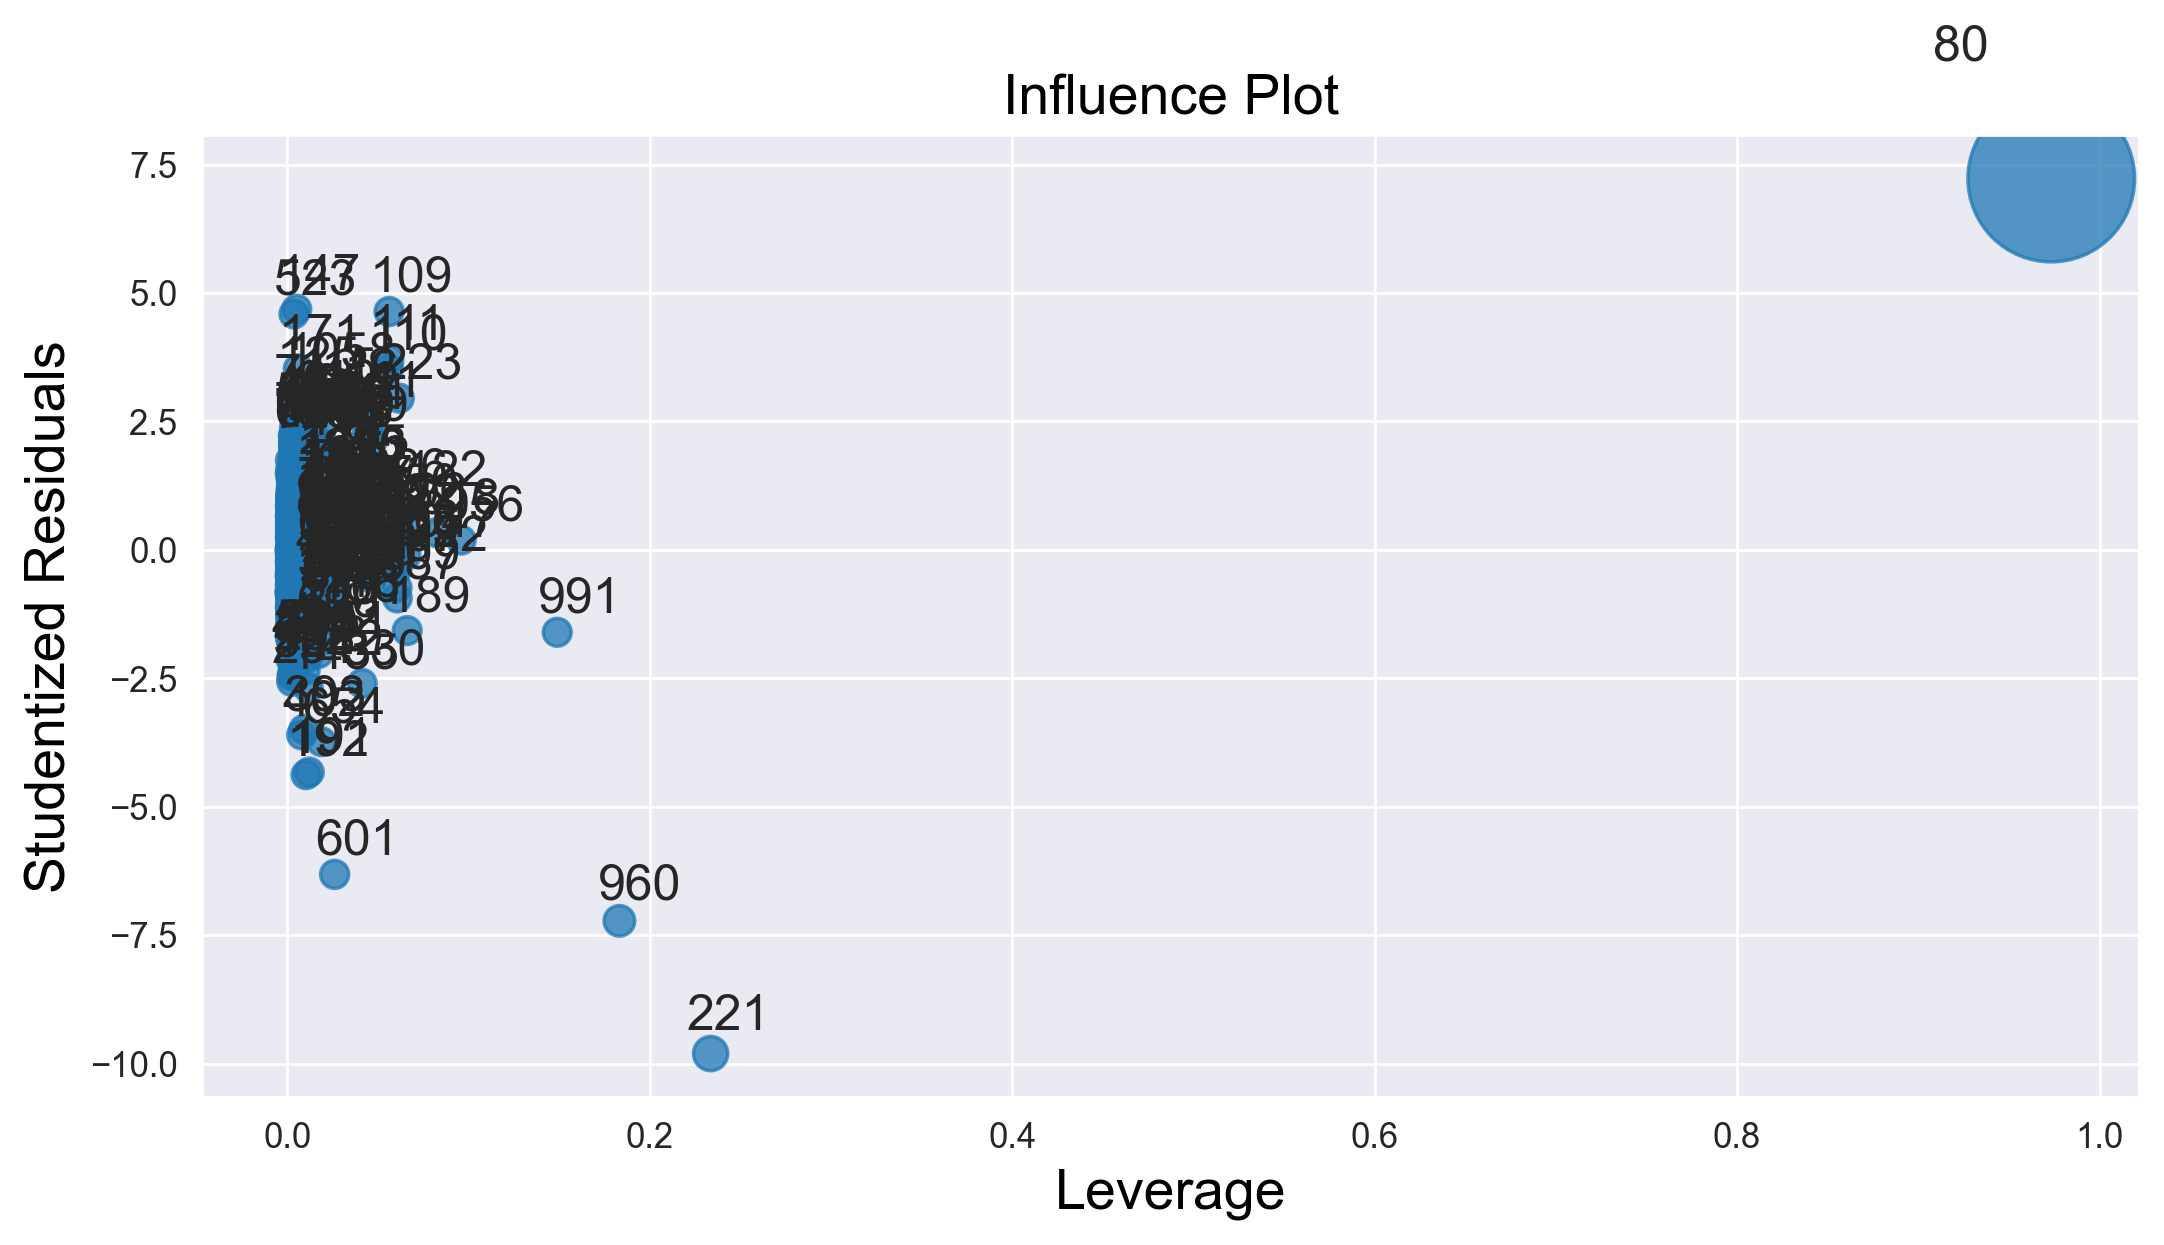

In [45]:
influence_plot(model);

In [46]:
#Calculate cutoff
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.02926829268292683

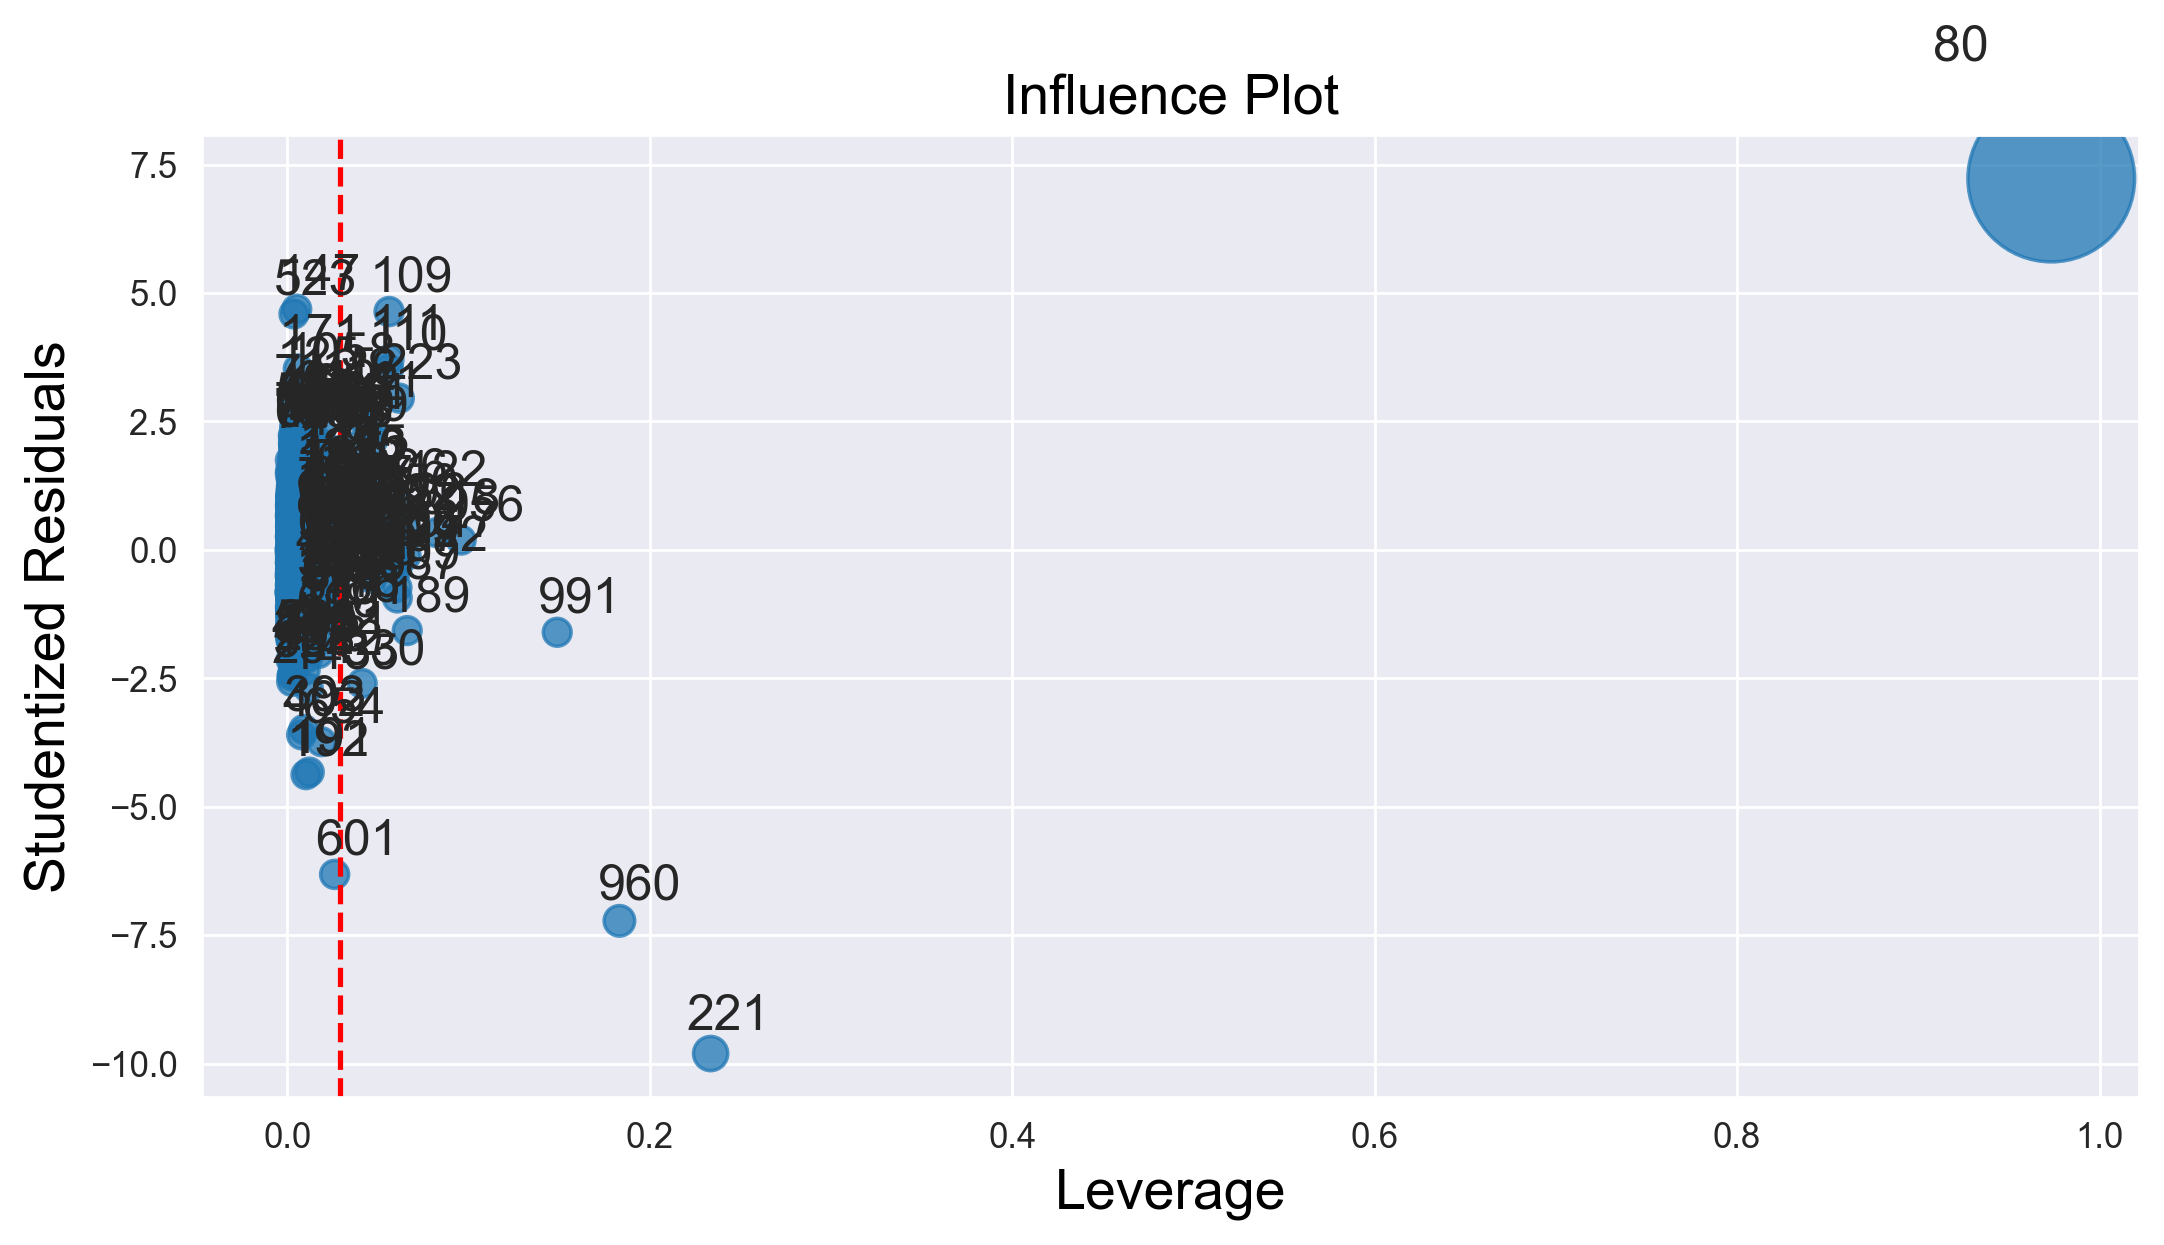

In [47]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')

# Improving the model

In [48]:
df.drop(index=80,inplace=True)

In [49]:
df

Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500         23  46986   90          0  2000      3          4      5   
1     13750         23  72937   90          0  2000      3          4      5   
2     13950         24  41711   90          0  2000      3          4      5   
3     14950         26  48000   90          0  2000      3          4      5   
4     13750         30  38500   90          0  2000      3          4      5   
...     ...        ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500         69  20544   86          0  1300      3          4      5   
1432  10845         72  19000   86          0  1300      3          4      5   
1433   8500         71  17016   86          0  1300      3          4      5   
1434   7250         70  16916   86          0  1300      3          4      5   
1435   6950         76      1  110          0  1600      5          4      5   

      Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0       1165              0                 1                 0  
1       1165              0                 1                 0  
2       1165              0                 1                 0  
3       1165              0                 1                 0  
4       1170              0                 1                 0  
...      ...            ...               ...               ...  
1431    1025              0                 0                 1  
1432    1015              0                 0                 1  
1433    1015              0                 0                 1  
1434    1015              0                 0                 1  
1435    1114              0                 0                 1  

[1434 rows x 13 columns]

In [ ]:
#reset the index

In [50]:
df.shape

(1434, 13)

In [51]:
df.reset_index(inplace=True) ##gives original index

In [52]:
df

index  Price  Age_08_04     KM   HP  Automatic    cc  Doors  Cylinders  \
0         0  13500         23  46986   90          0  2000      3          4   
1         1  13750         23  72937   90          0  2000      3          4   
2         2  13950         24  41711   90          0  2000      3          4   
3         3  14950         26  48000   90          0  2000      3          4   
4         4  13750         30  38500   90          0  2000      3          4   
...     ...    ...        ...    ...  ...        ...   ...    ...        ...   
1429   1431   7500         69  20544   86          0  1300      3          4   
1430   1432  10845         72  19000   86          0  1300      3          4   
1431   1433   8500         71  17016   86          0  1300      3          4   
1432   1434   7250         70  16916   86          0  1300      3          4   
1433   1435   6950         76      1  110          0  1600      5          4   

      Gears  Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0         5    1165              0                 1                 0  
1         5    1165              0                 1                 0  
2         5    1165              0                 1                 0  
3         5    1165              0                 1                 0  
4         5    1170              0                 1                 0  
...     ...     ...            ...               ...               ...  
1429      5    1025              0                 0                 1  
1430      5    1015              0                 0                 1  
1431      5    1015              0                 0                 1  
1432      5    1015              0                 0                 1  
1433      5    1114              0                 0                 1  

[1434 rows x 14 columns]

In [53]:
df.drop(columns=['index'], inplace=True)

In [54]:
final_model = smf.ols('Price~Age_08_04+Weight+Automatic+cc+Doors+Cylinders+Gears+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol', data = df).fit()

In [55]:
final_model.rsquared

0.8429171489386444

Since the value is <1 , we can stop the diagnostic process and finalize the model

# Predicting for new records

In [56]:
df.head()

Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165              0                 1                 0  
1    1165              0                 1                 0  
2    1165              0                 1                 0  
3    1165              0                 1                 0  
4    1170              0                 1                 0

In [57]:
test = pd.DataFrame({
    'Age_08_04' : [23,24,26],
    'Weight' : [5,5,5],
    'Automatic' : [0,0,0],
    'cc' :[2000,2000,2000],
    'Doors':[3,3,3],
    'Cylinders':[4,4,4],
    'Gears':[5,5,5],
    'Fuel_Type_CNG':[1,0,0],
    'Fuel_Type_Diesel':[0,1,0],
    'Fuel_Type_Petrol':[0,0,1],
})

In [58]:
final_model.params

Intercept           -789.341104
Age_08_04           -141.071263
Weight                26.006966
Automatic            274.483973
cc                     0.087435
Doors                -95.171631
Cylinders          -3157.364416
Gears                661.614546
Fuel_Type_CNG       -794.605243
Fuel_Type_Diesel   -1370.783969
Fuel_Type_Petrol    1376.048108
dtype: float64

In [59]:
test

Age_08_04  Weight  Automatic    cc  Doors  Cylinders  Gears  Fuel_Type_CNG  \
0         23       5          0  2000      3          4      5              1   
1         24       5          0  2000      3          4      5              0   
2         26       5          0  2000      3          4      5              0   

   Fuel_Type_Diesel  Fuel_Type_Petrol  
0                 0                 0  
1                 1                 0  
2                 0                 1

In [60]:
final_model.predict(test)

0   -14130.581056
1   -14847.831045
2   -12383.141494
dtype: float64